####### GROMACS-T4-GPU-CONNECTED-IN-COLAB-INSTALLED-IN-DRIVE-MOUNTED #######

In [ ]:
##### Hydroxy-methoxy - 6NPM ############

In [ ]:
### REFERED GROMAC TUTORIAL FOR PROTEIN-LIGAND SIMULATION
### Refered YOUtube https://www.youtube.com/watch?v=jeiWI6uBWO8&t=2240s
 ## [http://www.mdtutorials.com/gmx/complex/index.html]

In [ ]:
#### FIRST CONNECT TO T4-GPU , THEN RUN THE FOLLOWING CODES
####. GROMAC successfully CONNECTED TO GPU ####

In [ ]:
## check T4-GPU connection
!nvidia-smi

Wed Nov 12 08:31:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
# Step 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# Set permanent install path inside Drive
import os
gromacs_path = "/content/drive/MyDrive/gromacs-2021.4"

# Check if already installed
if not os.path.exists(gromacs_path):
    print("🚀 Installing GROMACS for the first time... (this will take ~20–30 min)")
    !apt-get update -qq
    !apt-get install -y build-essential cmake git wget unzip libfftw3-dev libgsl-dev

    # Download and extract GROMACS
    !wget -q http://ftp.gromacs.org/pub/gromacs/gromacs-2021.4.tar.gz -O gromacs-2021.4.tar.gz
    !tar -xf gromacs-2021.4.tar.gz
    %cd gromacs-2021.4
    !mkdir build
    %cd build
    !cmake .. -DGMX_BUILD_OWN_FFTW=ON \
              -DREGRESSIONTEST_DOWNLOAD=ON \
              -DGMX_GPU=CUDA \
              -DGMX_CUDA_TARGET_SM="75" \
              -DCMAKE_INSTALL_PREFIX={gromacs_path}
    !make -j4
    !make install
    print("✅ GROMACS successfully installed and saved in Drive!")

    # Clean temporary build files
    %cd /content
    !rm -rf gromacs-2021.4 gromacs-2021.4.tar.gz
else:
    print("✅ GROMACS already installed in Drive — skipping build.")

# Add GROMACS to PATH
os.environ["PATH"] = f"{gromacs_path}/bin:" + os.environ["PATH"]

# ✅ Set a permanent working directory for all your MD files
work_dir = "/content/drive/MyDrive/MD_work"
os.makedirs(work_dir, exist_ok=True)
%cd $work_dir

print(f"✅ Working directory set to: {work_dir}")
!gmx --version

✅ GROMACS already installed in Drive — skipping build.
/content/drive/MyDrive/MD_work
✅ Working directory set to: /content/drive/MyDrive/MD_work
/bin/bash: line 1: /content/drive/MyDrive/gromacs-2021.4/bin/gmx: Permission denied


In [3]:
!chmod -R +x /content/drive/MyDrive/gromacs-2021.4/bin

In [4]:
!gmx --version

                         :-) GROMACS - gmx, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Murtol

In [ ]:
################################### START TUTORIAL #####################################

In [ ]:
# GROMACS Tutorial
# Step One: Prepare the Protein Topology

In [ ]:
# 🧩 Step 1: Download the protein structure
## OR OPEN docked protein-ligand and save seperate files cleaned files as protein and ligand
## add H2 to ligand and save as .mol2 file
## upload this ligand.mol2 on swissparam site to get topology files

In [ ]:
# Open the PDB file in VMD, PyMOL, or UCSF Chimera to inspect it visually.

# You’ll notice:
# 	•	Protein chain(s)
# 	•	Ligand  bound in the protein cavity — keeping only the protein and the ligand.

In [5]:
## UPLOAD PDB FILE ....THIS CODE WILL UPLOAD THE FILE IN PERTICULR PATH YOU HAD SET
from google.colab import files
uploaded = files.upload() #  # select files ### UPLOAD FILE 6NPM.pdb [only protein]

Saving 6NPM.pdb to 6NPM.pdb


In [6]:
# Remove water molecule
!grep -v HOH 6NPM.pdb > 6NPM_protein.pdb

In [7]:
# remove any HETATM or ATOM lines for residue name KVD, write new file
!grep -v " KVD " 6NPM_protein.pdb > 6NPM_clean.pdb

In [8]:
# Protein topology
!gmx pdb2gmx -f 6NPM_clean.pdb -o 6NPM_processed.gro -water tip3p -ignh # Select force field when prompted (e.g., 8 for CHARMM27)

                     :-) GROMACS - gmx pdb2gmx, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [9]:
## upload only ligand.pdb with hydrogen added saved and uploaded that pdb to swiss param to get ligand.zip files in bulk
## then upload all zip ligand bulk files here

from google.colab import files
uploaded = files.upload() ##  LIG.pdb all 7 LIG files from swissparam [Hydroxy-methoxy]

Saving LIG.crd to LIG.crd
Saving LIG.itp to LIG.itp
Saving LIG.mol2 to LIG.mol2
Saving LIG.par to LIG.par
Saving LIG.pdb to LIG.pdb
Saving LIG.psf to LIG.psf
Saving LIG.rtf to LIG.rtf


In [10]:
!gmx editconf -f LIG.pdb -o lig.gro ## change output file name with different ligand

                     :-) GROMACS - gmx editconf, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu M

In [ ]:
## Edit the topol.top file to include the ligand topology from lig.gro , copy paste  as shown in tutorial
## refered tutorial link : http://www.mdtutorials.com/gmx/complex/02_topology.html

In [11]:
!gmx editconf -f 6NPM_processed.gro -o 6NPM_newbox.gro -c -d 1.2 -bt cubic # # protein is in the box

                     :-) GROMACS - gmx editconf, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu M

In [12]:
!gmx solvate -cp 6NPM_newbox.gro -cs spc216.gro -o 6NPM_solv.gro -p topol.top

                     :-) GROMACS - gmx solvate, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [13]:
## upload md parameter files all
from google.colab import files
uploaded = files.upload()  # select files ### UPLOAD FILES

Saving em.mdp to em.mdp
Saving ions.mdp to ions.mdp
Saving md.mdp to md.mdp
Saving npt.mdp to npt.mdp
Saving nvt.mdp to nvt.mdp


In [ ]:
## make changes in topol.top file as "# LIG.prm to LIG.itp " remove LIG.itp from last


In [14]:
!gmx grompp -f ions.mdp -c 6NPM_solv.gro -p topol.top -o ions.tpr

                      :-) GROMACS - gmx grompp, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [15]:
!gmx genion -s ions.tpr -o 6NPM_solv_ions.gro -p topol.top -pname NA -nname CL -neutral ## 15 for SOL

                      :-) GROMACS - gmx genion, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [16]:
!gmx grompp -f em.mdp -c 6NPM_solv_ions.gro -p topol.top -o em.tpr

                      :-) GROMACS - gmx grompp, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [17]:
!gmx mdrun -v -deffnm em

                      :-) GROMACS - gmx mdrun, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [18]:
!gmx energy -f em.edr -o potential.xvg ## 11 and 0 for potential

                      :-) GROMACS - gmx energy, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [19]:
!gmx make_ndx -f lig.gro -o index_lig.ndx # selext .. 0 & ! a H* and type q

                     :-) GROMACS - gmx make_ndx, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu M

In [20]:
!gmx genrestr -f lig.gro -n index_lig.ndx -o posre_lig.itp -fc 1000 1000 1000 ## type 3

                     :-) GROMACS - gmx genrestr, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu M

In [21]:
!gmx make_ndx -f em.gro -o index.ndx # 1 | 13

                     :-) GROMACS - gmx make_ndx, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu M

In [ ]:
## .  add this in topol.top file

# ; Ligand position restraints
#ifdef POSRES_LIG
#include "posre_lig.itp"
#endif

In [22]:
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr

                      :-) GROMACS - gmx grompp, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [23]:
!gmx mdrun -v -deffnm nvt

                      :-) GROMACS - gmx mdrun, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [24]:
!gmx energy -f nvt.edr -o temperature.xvg

                      :-) GROMACS - gmx energy, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [25]:
!gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -r nvt.gro -p topol.top -n index.ndx -o npt.tpr

                      :-) GROMACS - gmx grompp, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [26]:
!gmx mdrun -v -deffnm npt

                      :-) GROMACS - gmx mdrun, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [27]:
!gmx energy -f npt.edr -o pressure.xvg

                      :-) GROMACS - gmx energy, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [28]:
!gmx energy -f npt.edr -o density.xvg

                      :-) GROMACS - gmx energy, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [29]:
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o md_0_10.tpr ##check how much to set
## SELECTED ONLY NSTEPS AT 2500000 [5ns]

                      :-) GROMACS - gmx grompp, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [30]:
!gmx mdrun -v -deffnm md_0_10

                      :-) GROMACS - gmx mdrun, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [ ]:
### ............................. This take some time to complete 5ns MD run .............................### ## took 2hs approx in GPU colab

In [ ]:
#### Then run trajectory files setting

In [31]:
!gmx trjconv -s md_0_10.tpr -f md_0_10.xtc -o md_0_10_center.xtc -center -pbc mol -ur compact
## select protein and system .. 1 and 0

                     :-) GROMACS - gmx trjconv, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [ ]:
### ANALYSIS RMSD,RMSF, RG, H-BOND, Rg #### plots

In [32]:
## RMSD rmsd.xvg backbone backbone
!gmx rms -s em.tpr -f md_0_10_center.xtc -n index.ndx -tu ns -o rmsd.xvg
## Backbone and backbone ## select 4 and 4

                       :-) GROMACS - gmx rms, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Murt

In [33]:
## RMSD (protein-lig)
!gmx rms -s em.tpr -f md_0_10_center.xtc -n index.ndx -tu ns -o rmsd-prolig.xvg

####least square fit select 1 for protein  and 13 for ligand

                       :-) GROMACS - gmx rms, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Murt

In [34]:
## RMSD (rmsd-pro)
!gmx rms -s em.tpr -f md_0_10_center.xtc -n index.ndx -tu ns -o rmsd-pro.xvg

####least square fit select  1 protein and 4 backbone

                       :-) GROMACS - gmx rms, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Murt

In [35]:
## RMSD (rmsd-lig)
!gmx rms -s em.tpr -f md_0_10_center.xtc -n index.ndx -tu ns -o rmsd-lig.xvg

####least square fit select  13 Ligand and 4 backbone

                       :-) GROMACS - gmx rms, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Murt

In [36]:
## RMSF [backbone]
!gmx rmsf -s em.tpr -f md_0_10_center.xtc -n index.ndx -o rmsf.xvg
## 4 backbone

                       :-) GROMACS - gmx rmsf, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [37]:
## RMSF [ligand]
!gmx rmsf -s em.tpr -f md_0_10_center.xtc -n index.ndx -o rmsf-lig.xvg
## 13 LIgand

                       :-) GROMACS - gmx rmsf, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [38]:
## RMSF [protein]
!gmx rmsf -s em.tpr -f md_0_10_center.xtc -n index.ndx -o rmsf-pro.xvg
## 1 protein

                       :-) GROMACS - gmx rmsf, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [39]:
## R Gyration
!gmx gyrate -s em.tpr -f md_0_10_center.xtc -n index.ndx -o gyrate.xvg
# select 4 back bone

                      :-) GROMACS - gmx gyrate, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [40]:
## R Gyration [protein]
!gmx gyrate -s em.tpr -f md_0_10_center.xtc -n index.ndx -o gyrate-pro.xvg
# select 1 protein

                      :-) GROMACS - gmx gyrate, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [41]:
## R Gyration [ligand]
!gmx gyrate -s em.tpr -f md_0_10_center.xtc -n index.ndx -o gyrate-lig.xvg
# select 13 ligand

                      :-) GROMACS - gmx gyrate, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [42]:
## Hydrogen bonds [protein-ligand]
!gmx hbond -s em.tpr -f md_0_10_center.xtc -n index.ndx -num hbond.xvg
# select 1 as protein and 13 as ligand LIG


                      :-) GROMACS - gmx hbond, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

In [43]:
## ENERGY CALCULATIONS
!gmx energy -f em.edr -o interaction_energy.xvg
## select 9 LJ-SR


                      :-) GROMACS - gmx energy, 2021.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [ ]:
## ENERGY CALCULATIONS. [select any based on your project]
!gmx energy -f em.edr -o interaction_energy2.xvg

In [ ]:
### SAVE TRAJECTORY FILES
## RMSD, RMSF, GYRATION, HBOND .XVG FILES
## SAVE md_0_10.gro AND md_0_10.xtc FILES TO MAKE AND VIEW MOVIE IN PYMOL

In [ ]:
### USING matplotlip plots RMSD, RMSF Gyration , H bond for Protein-ligand Interation

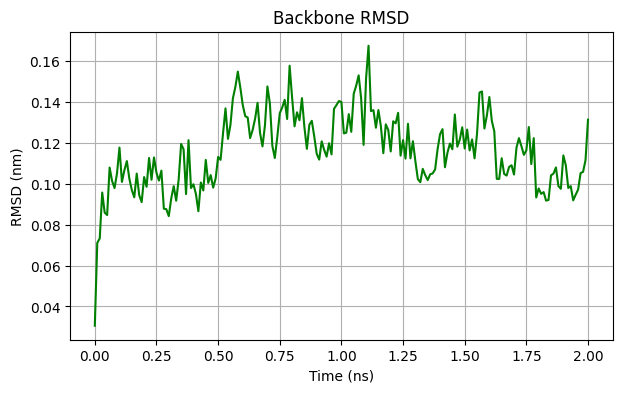

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Read file safely and clean it ---
with open("rmsd.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

# --- Extract numeric data ---
cleaned = []
for line in lines:
    # remove multiple spaces and split
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:  # at least 2 columns: Time, RMSD
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "RMSD"]).astype(float)

# --- Plot RMSD ---
plt.figure(figsize=(7,4))
plt.plot(data["Time"], data["RMSD"], color='green')
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.title("Backbone RMSD")
plt.grid(True)
plt.show()

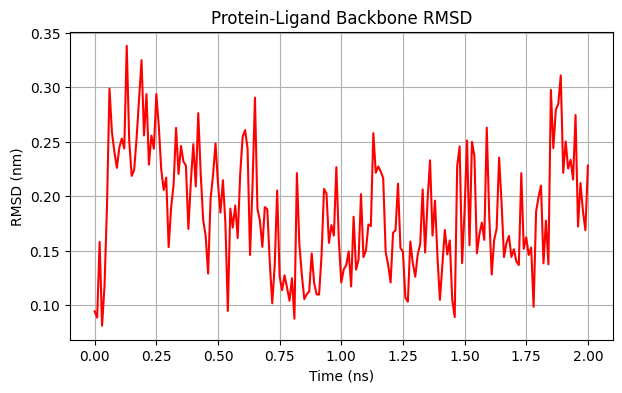

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Read file safely and clean it ---
with open("rmsd-prolig.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

# --- Extract numeric data ---
cleaned = []
for line in lines:
    # remove multiple spaces and split
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:  # at least 2 columns: Time, RMSD
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "RMSD"]).astype(float)

# --- Plot RMSD ---
plt.figure(figsize=(7,4))
plt.plot(data["Time"], data["RMSD"], color='red')
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.title("Protein-Ligand Backbone RMSD")
plt.grid(True)
plt.show()

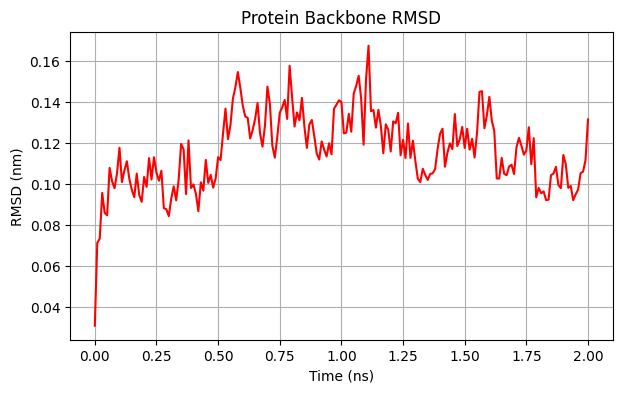

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Read file safely and clean it ---
with open("rmsd-pro.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

# --- Extract numeric data ---
cleaned = []
for line in lines:
    # remove multiple spaces and split
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:  # at least 2 columns: Time, RMSD
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "RMSD"]).astype(float)

# --- Plot RMSD ---
plt.figure(figsize=(7,4))
plt.plot(data["Time"], data["RMSD"], color='red')
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.title("Protein Backbone RMSD")
plt.grid(True)
plt.show()

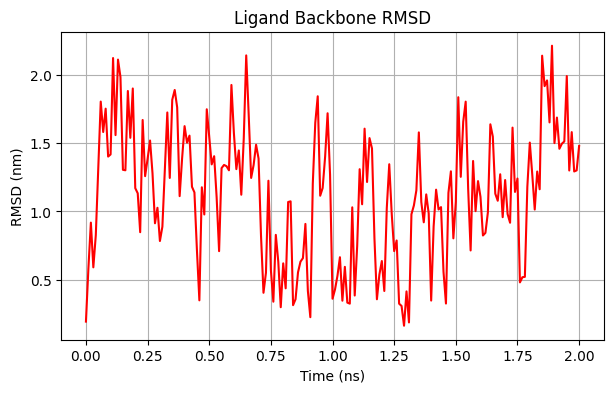

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Read file safely and clean it ---
with open("rmsd-lig.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

# --- Extract numeric data ---
cleaned = []
for line in lines:
    # remove multiple spaces and split
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:  # at least 2 columns: Time, RMSD
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "RMSD"]).astype(float)

# --- Plot RMSD ---
plt.figure(figsize=(7,4))
plt.plot(data["Time"], data["RMSD"], color='red')
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.title("Ligand Backbone RMSD")
plt.grid(True)
plt.show()

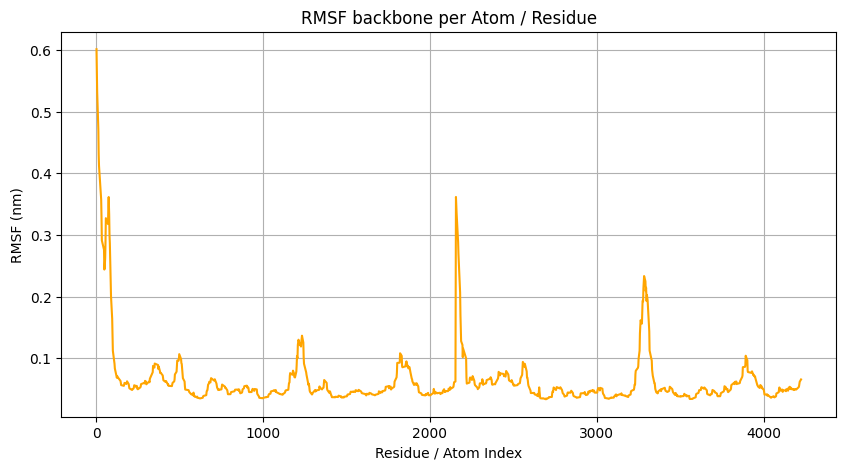

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Clean and load RMSF data ---
with open("rmsf.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

cleaned = []
for line in lines:
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Atom", "RMSF"]).astype(float)

# --- Plot RMSF ---
plt.figure(figsize=(10,5))
plt.plot(data["Atom"], data["RMSF"], color='orange')
plt.xlabel("Residue / Atom Index")
plt.ylabel("RMSF (nm)")
plt.title("RMSF backbone per Atom / Residue")
plt.grid(True)
plt.show()

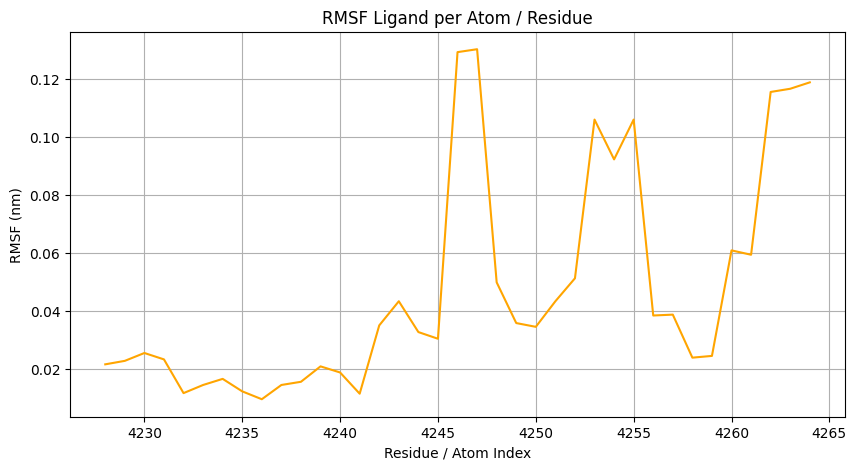

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Clean and load RMSF data ---
with open("rmsf-lig.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

cleaned = []
for line in lines:
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Atom", "RMSF"]).astype(float)

# --- Plot RMSF ---
plt.figure(figsize=(10,5))
plt.plot(data["Atom"], data["RMSF"], color='orange')
plt.xlabel("Residue / Atom Index")
plt.ylabel("RMSF (nm)")
plt.title("RMSF Ligand per Atom / Residue")
plt.grid(True)
plt.show()

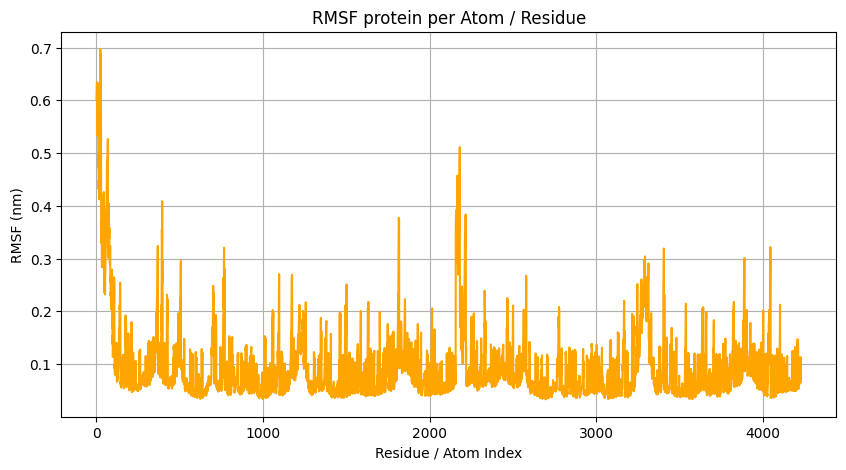

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Clean and load RMSF data ---
with open("rmsf-pro.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

cleaned = []
for line in lines:
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 2:
        cleaned.append(parts[:2])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Atom", "RMSF"]).astype(float)

# --- Plot RMSF ---
plt.figure(figsize=(10,5))
plt.plot(data["Atom"], data["RMSF"], color='orange')
plt.xlabel("Residue / Atom Index")
plt.ylabel("RMSF (nm)")
plt.title("RMSF protein per Atom / Residue")
plt.grid(True)
plt.show()

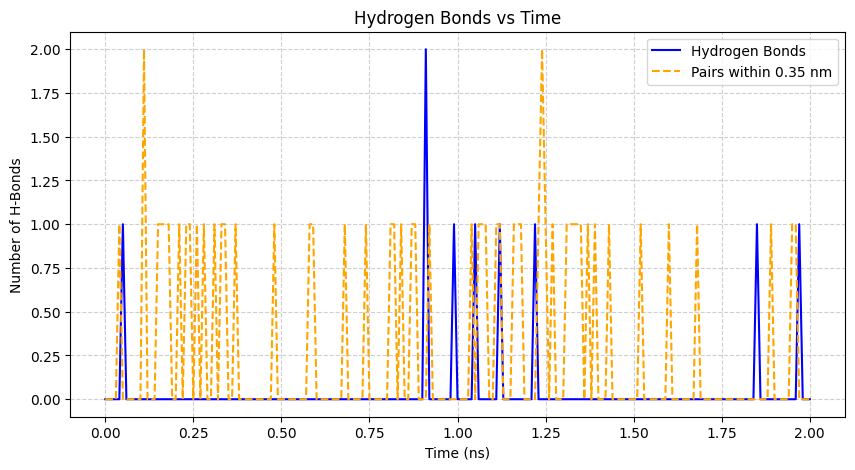

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Load and clean hbond.xvg ---
with open("hbond.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

# --- Parse columns ---
cleaned = []
for line in lines:
    parts = re.split(r'\s+', line.strip())
    if len(parts) >= 3:
        cleaned.append(parts[:3])

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time_ps", "HBonds", "Pairs"]).astype(float)

# --- Convert time to nanoseconds ---
data["Time_ns"] = data["Time_ps"] / 1000.0

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(data["Time_ns"], data["HBonds"], label="Hydrogen Bonds", color="blue", linewidth=1.5)
plt.plot(data["Time_ns"], data["Pairs"], label="Pairs within 0.35 nm", color="orange", linestyle="--")

plt.xlabel("Time (ns)")
plt.ylabel("Number of H-Bonds")
plt.title("Hydrogen Bonds vs Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

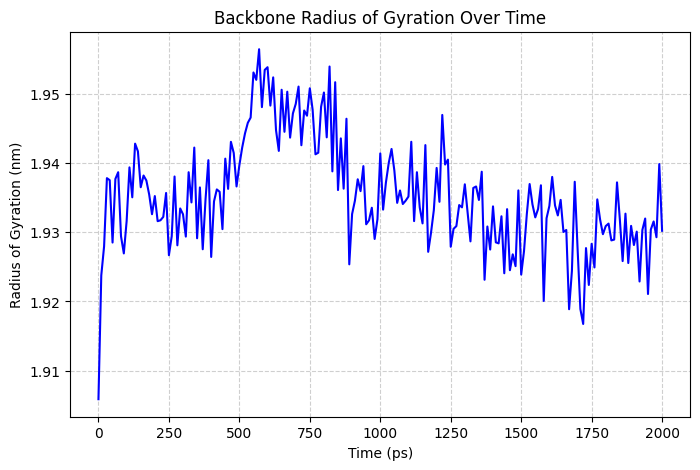

Average Rg: 1.935 nm ± 0.008 nm


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Clean and load gyrate.xvg safely ---
with open("gyrate.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

cleaned = []
for line in lines:
    # Split by any amount of whitespace
    parts = re.split(r'\s+', line.strip())
    # Only take numeric columns (first two if too many)
    if len(parts) >= 2:
        cleaned.append(parts[:2])  # Time, Rg (first two columns only)

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "Rg"]).astype(float)

# --- Plot Radius of Gyration ---
plt.figure(figsize=(8,5))
plt.plot(data["Time"], data["Rg"], color="blue", linewidth=1.5)
plt.xlabel("Time (ps)")
plt.ylabel("Radius of Gyration (nm)")
plt.title("Backbone Radius of Gyration Over Time")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Optional: Compute Mean and SD ---
mean_rg = data["Rg"].mean()
std_rg = data["Rg"].std()
print(f"Average Rg: {mean_rg:.3f} nm ± {std_rg:.3f} nm")

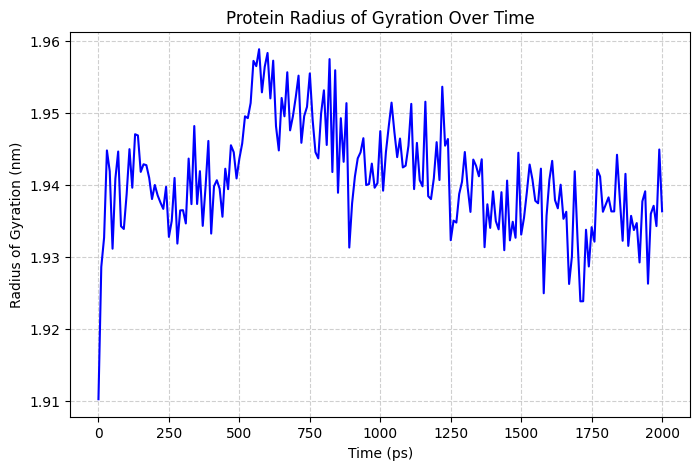

Average Rg: 1.941 nm ± 0.007 nm


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Clean and load gyrate.xvg safely ---
with open("gyrate-pro.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

cleaned = []
for line in lines:
    # Split by any amount of whitespace
    parts = re.split(r'\s+', line.strip())
    # Only take numeric columns (first two if too many)
    if len(parts) >= 2:
        cleaned.append(parts[:2])  # Time, Rg (first two columns only)

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "Rg"]).astype(float)

# --- Plot Radius of Gyration ---
plt.figure(figsize=(8,5))
plt.plot(data["Time"], data["Rg"], color="blue", linewidth=1.5)
plt.xlabel("Time (ps)")
plt.ylabel("Radius of Gyration (nm)")
plt.title("Protein Radius of Gyration Over Time")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Optional: Compute Mean and SD ---
mean_rg = data["Rg"].mean()
std_rg = data["Rg"].std()
print(f"Average Rg: {mean_rg:.3f} nm ± {std_rg:.3f} nm")

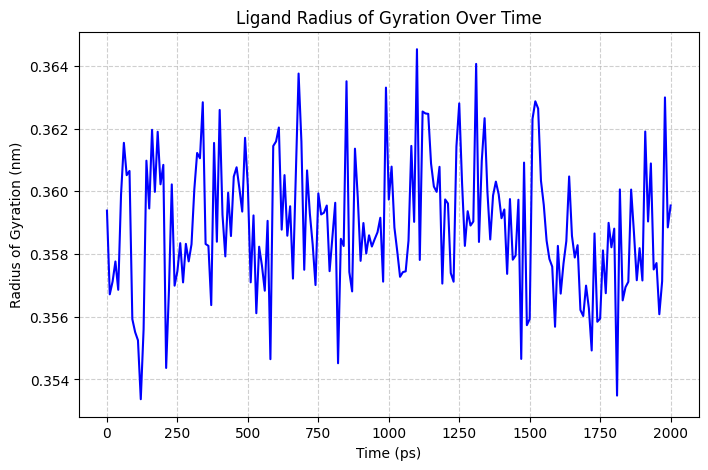

Average Rg: 0.359 nm ± 0.002 nm


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Clean and load gyrate.xvg safely ---
with open("gyrate-lig.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

cleaned = []
for line in lines:
    # Split by any amount of whitespace
    parts = re.split(r'\s+', line.strip())
    # Only take numeric columns (first two if too many)
    if len(parts) >= 2:
        cleaned.append(parts[:2])  # Time, Rg (first two columns only)

# --- Create DataFrame ---
data = pd.DataFrame(cleaned, columns=["Time", "Rg"]).astype(float)

# --- Plot Radius of Gyration ---
plt.figure(figsize=(8,5))
plt.plot(data["Time"], data["Rg"], color="blue", linewidth=1.5)
plt.xlabel("Time (ps)")
plt.ylabel("Radius of Gyration (nm)")
plt.title("Ligand Radius of Gyration Over Time")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Optional: Compute Mean and SD ---
mean_rg = data["Rg"].mean()
std_rg = data["Rg"].std()
print(f"Average Rg: {mean_rg:.3f} nm ± {std_rg:.3f} nm")

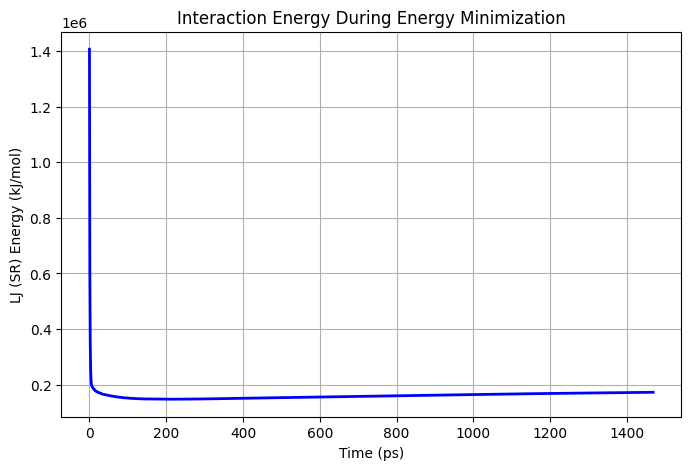

In [55]:
## Energy-Interaction

import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO  # ✅ import from io instead of pandas

# Read and clean data
with open("/content/drive/MyDrive/MD_work/interaction_energy.xvg") as f:
    lines = [line for line in f if not line.startswith(('@', '#'))]

# Load into DataFrame
data = pd.read_csv(StringIO(''.join(lines)), sep=r'\s+', names=["Time_ps", "LJ_SR"])

# Plot
plt.figure(figsize=(8,5))
plt.plot(data["Time_ps"], data["LJ_SR"], color='blue', linewidth=2)
plt.xlabel("Time (ps)")
plt.ylabel("LJ (SR) Energy (kJ/mol)")
plt.title("Interaction Energy During Energy Minimization")
plt.grid(True)
plt.show()

/tmp/ipython-input-4240318986.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(''.join(lines)),
/tmp/ipython-input-4240318986.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(''.join(lines)),


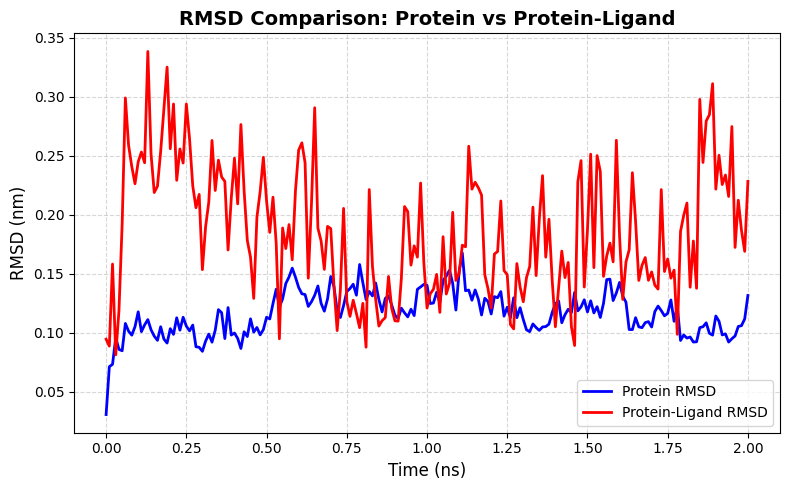

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO  # ✅ use built-in StringIO

# Function to read .xvg file (ignores comments)
def read_xvg(filename):
    with open(filename, 'r') as f:
        lines = [line for line in f if not line.startswith(('#', '@'))]
    data = pd.read_csv(StringIO(''.join(lines)),
                       delim_whitespace=True, header=None, names=['Time (ns)', 'RMSD (nm)'])
    return data

# Read both RMSD files
protein = read_xvg("rmsd-pro.xvg")
prolig = read_xvg("rmsd-prolig.xvg")

# Plot both curves
plt.figure(figsize=(8,5))
plt.plot(protein['Time (ns)'], protein['RMSD (nm)'], label='Protein RMSD', color='blue', linewidth=2)
plt.plot(prolig['Time (ns)'], prolig['RMSD (nm)'], label='Protein-Ligand RMSD', color='red', linewidth=2)

# Plot formatting
plt.xlabel('Time (ns)', fontsize=12)
plt.ylabel('RMSD (nm)', fontsize=12)
plt.title('RMSD Comparison: Protein vs Protein-Ligand', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save plot (optional)
# plt.savefig("RMSD_Protein_vs_ProteinLigand.png", dpi=300)

# Show plot
plt.show()

In [ ]:
#### Next make md-simulation movie...... [trial] try in pymol ...or UCSF chimera

# Using PyMOL
# 1. Load .pdb (structure) and .xtc (trajectory) in PyMOL:

# load md_0_10.gro
# load_traj md_0_10.xtc, md_0_10.gro

# 2. style your molecule (cartoon for protein, sticks for ligand)
# 3. use pymols movie wizard:
# movie - animation- play
# movie - export -movie as MP4

In [ ]:
###################### If to continue simulation for more time 10ns, 20ns, or 100ns etc ######################

In [ ]:
## 1) (Optional) make safe backups

!cp -v md_0_10.cpt md_0_10.cpt.bak
!cp -v md_0_10.tpr md_0_10.tpr.bak
# don't copy the big xtc unless you need an extra copy

In [ ]:
# 2) Edit md.mdp — set total steps (100 ns total)

# Open md.mdp and set (or replace) the nsteps line:
# nsteps = 50000000 [100ns]
# (If dt=0.002 ps, then 1 ns = 500,000 steps → 10 ns = 5,000,000 steps.)

In [ ]:
# 3) Generate a new TPR that continues from the checkpoint (keeps velocities, step count, box)

!gmx grompp -f md.mdp -c md_0_10.gro -t md_0_10.cpt -p topol.top -n index.ndx -o md_0_20.tpr

In [ ]:
# 4) Continue the run (append to existing md_0_10.*) — verbose

# Because previous outputs are named md_0_10.*, run with the same base name to append:

!gmx mdrun -s md_0_20.tpr -cpi md_0_10.cpt -deffnm md_0_10 -append -v

In [ ]:
#### Then Run all from Trajectory files again and ANALYSIS RMSD,RMSF, RG, H-BOND, Rg #### plots